In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart_2022_no_nans.csv")

In [4]:
selected_columns = ["State", "GeneralHealth", "PhysicalActivities", "SleepHours", "HadHeartAttack", "HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer", "HadCOPD", "HadDepressiveDisorder", "HadKidneyDisease", "HadArthritis", "HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty", "SmokerStatus", "ECigaretteUsage", "AgeCategory", "WeightInKilograms", "BMI", "AlcoholDrinkers", "CovidPos"]
subset = data[selected_columns]
subset.head

<bound method NDFrame.head of                  State GeneralHealth PhysicalActivities  SleepHours  \
0              Alabama     Very good                Yes         9.0   
1              Alabama     Very good                Yes         6.0   
2              Alabama     Very good                 No         8.0   
3              Alabama          Fair                Yes         9.0   
4              Alabama          Good                Yes         5.0   
...                ...           ...                ...         ...   
246017  Virgin Islands     Very good                Yes         6.0   
246018  Virgin Islands          Fair                Yes         7.0   
246019  Virgin Islands          Good                Yes         7.0   
246020  Virgin Islands     Excellent                Yes         7.0   
246021  Virgin Islands     Very good                 No         5.0   

       HadHeartAttack HadAngina HadStroke HadAsthma HadSkinCancer HadCOPD  \
0                  No        No        N

In [3]:
heart_disease_patients = subset[(subset['HadHeartAttack'] == 'Yes') | (subset['HadAngina'] == 'Yes')]

indicator_columns = [
    'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands'
]

state_indicator_counts = (
    heart_disease_patients.groupby('State')[indicator_columns]
    .apply(lambda x: x.eq('Yes').sum().idxmax())
)

print(state_indicator_counts)

NameError: name 'subset' is not defined

In [3]:
heart_disease_patients = data[(data['HadHeartAttack'] == 'Yes') | (data['HadAngina'] == 'Yes')]

indicator_columns = [
    'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands'
]

state_indicator_counts = (
    heart_disease_patients.groupby('State')[indicator_columns]
    .apply(lambda x: x.eq('Yes').sum().idxmax())
)

print(state_indicator_counts)

State
Alabama                 HadArthritis
Alaska                  HadArthritis
Arizona                 HadArthritis
Arkansas                HadArthritis
California              HadArthritis
Colorado                HadArthritis
Connecticut             HadArthritis
Delaware                HadArthritis
District of Columbia    HadArthritis
Florida                 HadArthritis
Georgia                 HadArthritis
Guam                     HadDiabetes
Hawaii                  HadArthritis
Idaho                   HadArthritis
Illinois                HadArthritis
Indiana                 HadArthritis
Iowa                    HadArthritis
Kansas                  HadArthritis
Kentucky                HadArthritis
Louisiana               HadArthritis
Maine                   HadArthritis
Maryland                HadArthritis
Massachusetts           HadArthritis
Michigan                HadArthritis
Minnesota               HadArthritis
Mississippi             HadArthritis
Missouri                HadArthr

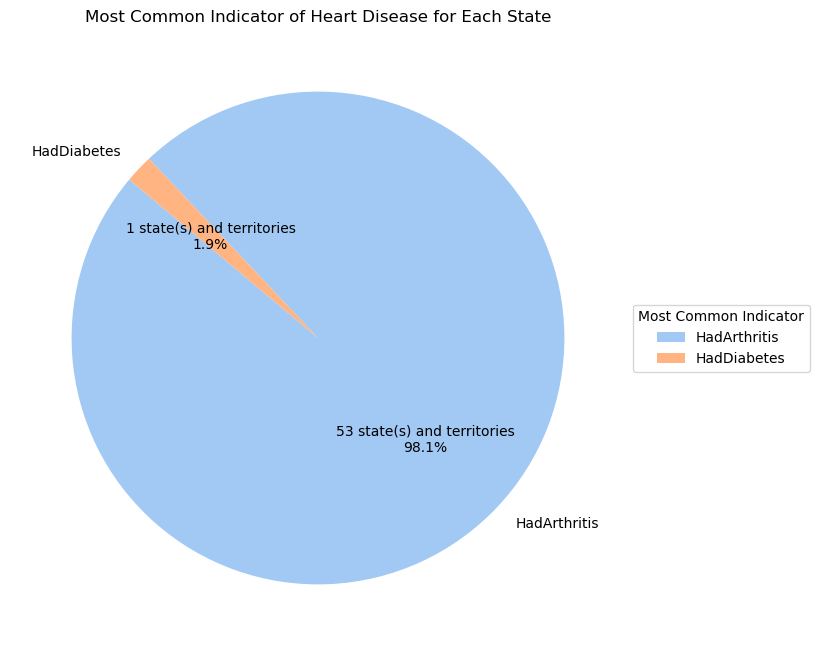

In [4]:
state_indicator_counts_df = state_indicator_counts.reset_index(name='MostCommonIndicator')

# Count occurrences of each MostCommonIndicator
indicator_counts = state_indicator_counts_df['MostCommonIndicator'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(indicator_counts, labels=indicator_counts.index, autopct=lambda p: f'{int(p * sum(indicator_counts) / 100)} state(s) and territories\n{p:.1f}%', startangle=140, colors=sns.color_palette('pastel'))

# Add title
plt.title('Most Common Indicator of Heart Disease for Each State')

# Add a legend with the MostCommonIndicator and its count
plt.legend(wedges, indicator_counts.index, title='Most Common Indicator', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


In [23]:
top_3 = (
    heart_disease_patients.groupby('State')[indicator_columns]
    .apply(lambda x: x.eq('Yes').sum().nlargest(3).index.tolist())
)

In [14]:
non_guam_states = heart_disease_patients[heart_disease_patients['State'] != 'Guam']

# Count the number of heart disease patients with Arthritis for each state
arthritis_counts = non_guam_states.groupby('State')['HadArthritis'].value_counts().unstack().fillna(0)

# Get the total number of heart disease patients for each state
total_heart_disease_counts = non_guam_states['State'].value_counts()

# Calculate the percentage of heart disease patients with Arthritis for each state
arthritis_percentage = (arthritis_counts['Yes'] / total_heart_disease_counts) * 100

# Display the result
print(arthritis_percentage)

Alabama                 65.416667
Alaska                  56.910569
Arizona                 56.985294
Arkansas                66.052632
California              53.538462
Colorado                53.465347
Connecticut             57.631579
Delaware                60.913706
District of Columbia    43.750000
Florida                 62.146893
Georgia                 62.906725
Hawaii                  52.512563
Idaho                   53.941909
Illinois                52.197802
Indiana                 59.927798
Iowa                    53.674833
Kansas                  59.409594
Kentucky                61.923077
Louisiana               66.211604
Maine                   59.370079
Maryland                57.213930
Massachusetts           55.527638
Michigan                60.685484
Minnesota               53.618907
Mississippi             62.443439
Missouri                61.340206
Montana                 62.908012
Nebraska                64.388489
Nevada                  60.344828
New Hampshire 

In [15]:
guam_heart_disease_patients = heart_disease_patients[heart_disease_patients['State'] == 'Guam']

# Count the number of heart disease patients with Diabetes in Guam
diabetes_counts_guam = guam_heart_disease_patients['HadDiabetes'].value_counts()

# Get the total number of heart disease patients in Guam
total_heart_disease_counts_guam = guam_heart_disease_patients.shape[0]

# Calculate the percentage of heart disease patients with Diabetes in Guam
diabetes_percentage_guam = (diabetes_counts_guam['Yes'] / total_heart_disease_counts_guam) * 100

# Display the result
print(diabetes_percentage_guam)

45.66929133858268


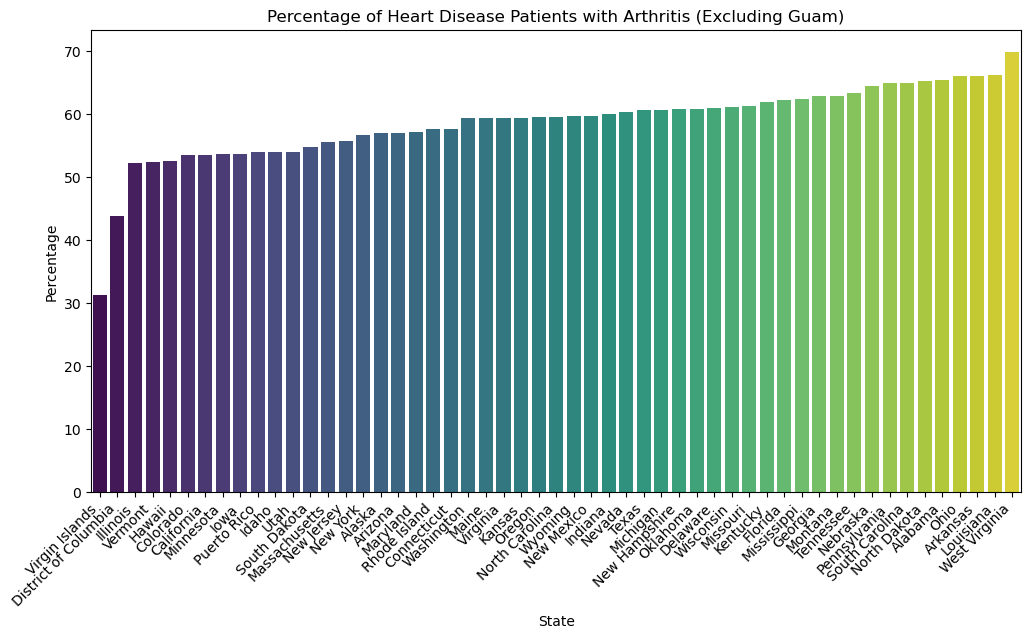

In [20]:

# Exclude Guam
heart_disease_patients_except_guam = heart_disease_patients[heart_disease_patients['State'] != 'Guam']

# Calculate the percentage of heart disease patients with Arthritis for each state
arthritis_percentages = (
    heart_disease_patients_except_guam[heart_disease_patients_except_guam['HadArthritis'] == 'Yes']
    .groupby('State')
    .size() / heart_disease_patients_except_guam.groupby('State').size() * 100
).reset_index(name='Percentage')

# Plotting Arthritis percentages using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Percentage', data=arthritis_percentages.sort_values('Percentage'), palette='viridis')
plt.title('Percentage of Heart Disease Patients with Arthritis (Excluding Guam)')
plt.xlabel('State')
plt.ylabel('Percentage')

# Rotate x-axis state names for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

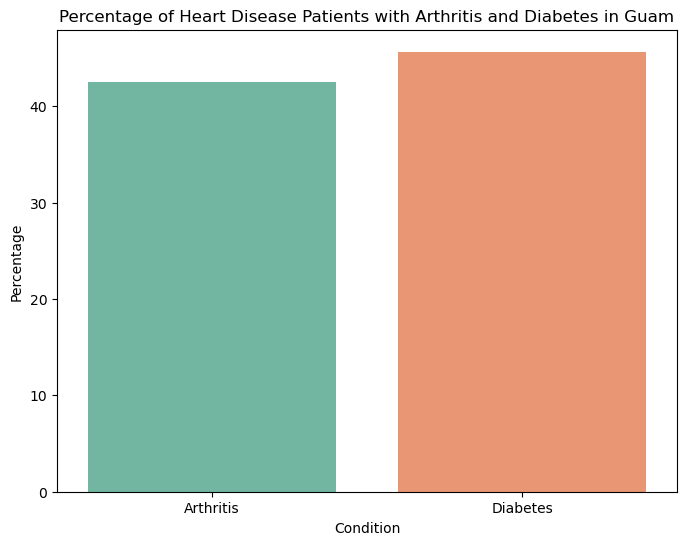

In [22]:
heart_disease_patients_guam = heart_disease_patients[heart_disease_patients['State'] == 'Guam']

arthritis_percentage_guam = (
    heart_disease_patients_guam[heart_disease_patients_guam['HadArthritis'] == 'Yes']
    .shape[0] / heart_disease_patients_guam.shape[0] * 100
)

# Calculate the percentage of heart disease patients with Diabetes for Guam
diabetes_percentage_guam = (
    heart_disease_patients_guam[heart_disease_patients_guam['HadDiabetes'] == 'Yes']
    .shape[0] / heart_disease_patients_guam.shape[0] * 100
)

# Create a DataFrame for plotting
guam_percentages = pd.DataFrame({
    'Condition': ['Arthritis', 'Diabetes'],
    'Percentage': [arthritis_percentage_guam, diabetes_percentage_guam]
})

# Plotting Arthritis and Diabetes percentages for Guam using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition', y='Percentage', data=guam_percentages, palette='Set2')
plt.title('Percentage of Heart Disease Patients with Arthritis and Diabetes in Guam')
plt.xlabel('Condition')
plt.ylabel('Percentage')

plt.show()